In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
# Load training data
train_df = pd.read_csv('KDDTrain+.txt', header=None)


In [72]:
# Adjust column
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count','srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

train_df.columns = columns

In [73]:
# check the object type column
data_obj = train_df.select_dtypes(['object']).columns
data_obj

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [74]:
train_df["attack"].value_counts()

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [75]:
# classify attack column as normal and attack.
attack_n = []
for i in train_df.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
train_df['attack'] = attack_n 

In [76]:
# Preprocess categorical features
protocol_type_le = preprocessing.LabelEncoder()
service_le = preprocessing.LabelEncoder()
flag_le = preprocessing.LabelEncoder()

In [77]:
#convert categorical data into numerical data.
train_df['protocol_type'] = protocol_type_le.fit_transform(train_df['protocol_type'])
train_df['service'] = service_le.fit_transform(train_df['service'])
train_df['flag'] = flag_le.fit_transform(train_df['flag'])

In [78]:
# Define features and labels
X_train = train_df.drop(columns=['attack'])
y_train = train_df['attack']



In [79]:
# Check how many data points are labeled as "attack" and how many as "normal"
attack_counts = train_df['attack'].value_counts()
print("Attack counts:\n", attack_counts)

Attack counts:
 attack
0    67343
1    58630
Name: count, dtype: int64


In [80]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [81]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=40)
svm_model.fit(X_train, y_train)

SVC(random_state=40)

In [82]:
# Save the model and the scaler
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Testing the model

In [83]:
# Load testing data
test_df = pd.read_csv('KDDTest+.txt', header=None)


In [84]:
# Adjust column
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count','srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

test_df.columns = columns

In [85]:
# check the object type column
data_obj = test_df.select_dtypes(['object']).columns
data_obj

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [86]:
test_df["attack"].value_counts()

attack
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

In [87]:
# classify attack column as normal and attack.
attack_n = []
for i in test_df.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
test_df['attack'] = attack_n 

In [88]:
# Preprocess categorical features
protocol_type_le = preprocessing.LabelEncoder()
service_le = preprocessing.LabelEncoder()
flag_le = preprocessing.LabelEncoder()

In [89]:
#convert categorical data into numerical data.
test_df['protocol_type'] = protocol_type_le.fit_transform(test_df['protocol_type'])
test_df['service'] = service_le.fit_transform(test_df['service'])
test_df['flag'] = flag_le.fit_transform(test_df['flag'])

In [90]:
# Define features and labels
X_test = test_df.drop(columns=['attack'])
y_test = test_df['attack']


In [97]:
# Check how many data points are labeled as "attack" and how many as "normal"
attack_counts = test_df['attack'].value_counts()
print("Attack counts:\n", attack_counts)

Attack counts:
 attack
1    12833
0     9711
Name: count, dtype: int64


In [91]:
# Load the scaler and standardize features
scaler = joblib.load('scaler.pkl')
X_test = scaler.transform(X_test)

### Test the saved model on the testing dataset

In [92]:
# Load the trained model
svm_model = joblib.load('svm_model.pkl')

In [93]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [94]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Testing accuracy:', accuracy)

Testing accuracy: 0.8516234918381831


In [95]:
def plot_cm(y_true, y_pred, title):
    figsize=(10,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "mako", annot=annot, fmt='', ax=ax)

C:\Users\shree\AppData\Local\Temp\ipykernel_14160\2836768641.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


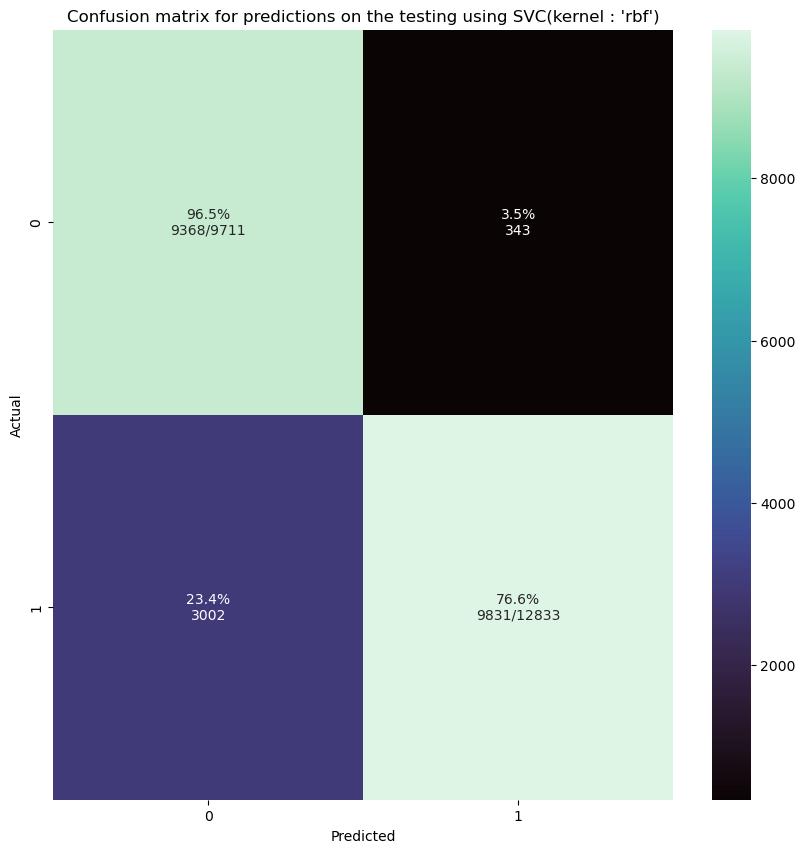

In [96]:
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the testing using SVC(kernel : \'rbf\')')